# Formaterer Dataen som i Del 1

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funksjoner import Del1, Del2


filnavn = '../data/table.csv'
del1 = Del1(filnavn)
data = del1.load_data()
data = del1.clean_data()


# Dataanalyse

In [2]:
del2 = Del2(data)
kolonner = ["Tid(norsk normaltid)", "Høyeste vindkast (1 t)", "Lufttemperatur"]

# Printe ut statistiske verdier for vindkast
print("Gjennomsnittlig vindkast:", del2.compute_mean("Høyeste vindkast (1 t)"))
print("Median vindkast:", del2.compute_median("Høyeste vindkast (1 t)"))
print("Standardavvik vindkast:", del2.compute_stdv("Høyeste vindkast (1 t)"), '\n')
print("Enkel analyse av vindkast:", del2.simple_analysis("Høyeste vindkast (1 t)"), '\n', '\n')

# Printe ut statistiske verdier for temperatur
print("Gjennomsnittlig temperatur:", del2.compute_mean("Lufttemperatur"))
print("Median temperatur:", del2.compute_median("Lufttemperatur"))
print("Standardavvik temperatur:", del2.compute_stdv("Lufttemperatur"), '\n')
print("Enkel analyse av temperatur:", del2.simple_analysis("Lufttemperatur"))


Gjennomsnitt for 'Høyeste vindkast (1 t)': 11.29
Gjennomsnittlig vindkast: 11.288067665758401
Median for 'Høyeste vindkast (1 t)': 10.50
Median vindkast: 10.5
Varians for 'Høyeste vindkast (1 t)': 5.78
Standardavvik vindkast: 5.776701283915553 

count    8808.000000
mean       11.288068
std         5.776701
min         0.900000
25%         7.100000
50%        10.500000
75%        14.400000
max        39.200000
Name: Høyeste vindkast (1 t), dtype: float64
Enkel analyse av vindkast: None 
 

Gjennomsnitt for 'Lufttemperatur': 3.79
Gjennomsnittlig temperatur: 3.7922116257947325
Median for 'Lufttemperatur': 3.00
Median temperatur: 3.0
Varians for 'Lufttemperatur': 7.03
Standardavvik temperatur: 7.034264189153865 

count    8808.000000
mean        3.792212
std         7.034264
min       -15.700000
25%        -1.200000
50%         3.000000
75%         8.100000
max        28.800000
Name: Lufttemperatur, dtype: float64
Enkel analyse av temperatur: None


# Visualisering

Først vanlig visualisering av dataene

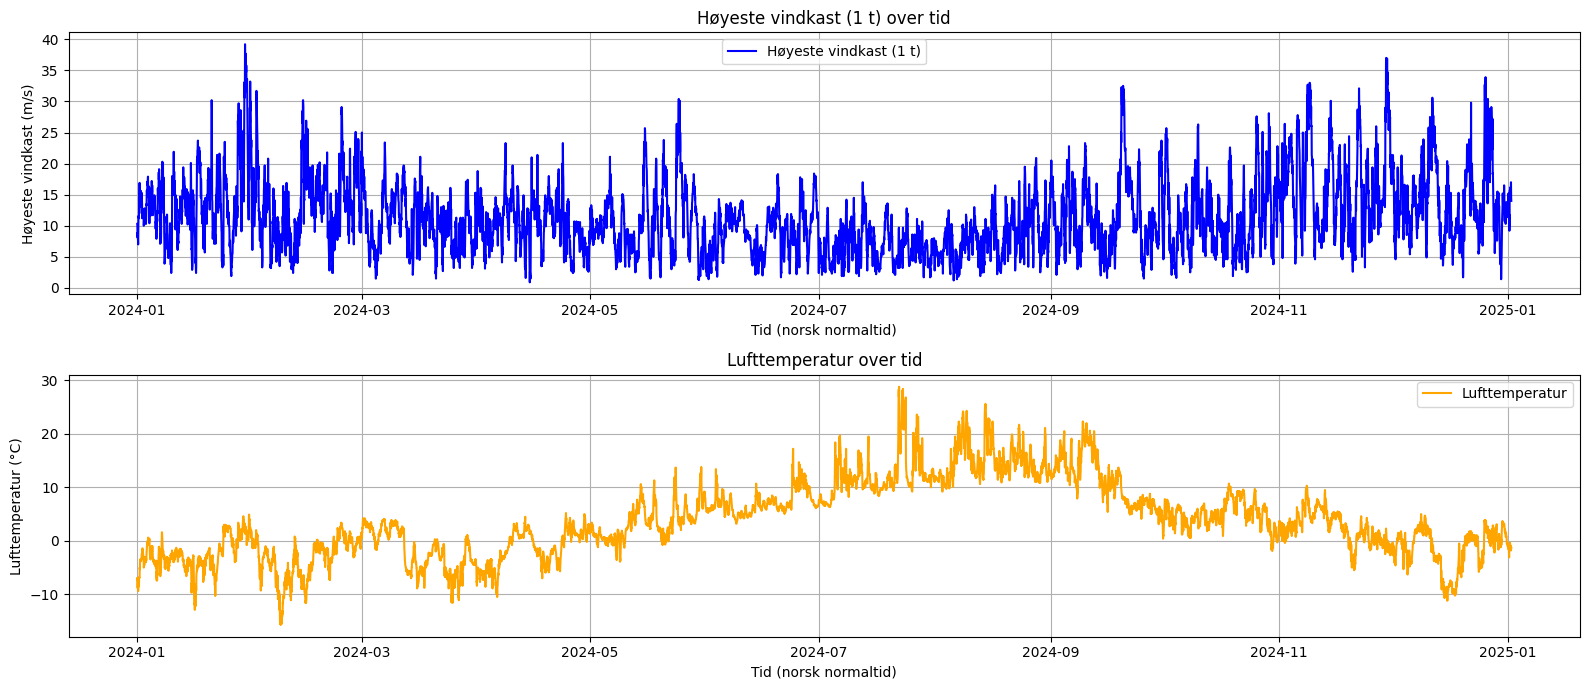

In [3]:
#Plotting "Høyeste vindkast (1 t)" og "Lufttemperatur" over tid
plt.figure(figsize=(16, 7))

#Plot for "Høyeste vindkast (1 t)"
plt.subplot(2, 1, 1)
plt.plot(data["Tid(norsk normaltid)"], data["Høyeste vindkast (1 t)"], label="Høyeste vindkast (1 t)", color="blue")
plt.title("Høyeste vindkast (1 t) over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Høyeste vindkast (m/s)")
plt.grid(True)
plt.legend()

# Plot for "Lufttemperatur"
plt.subplot(2, 1, 2)
plt.plot(data["Tid(norsk normaltid)"], data["Lufttemperatur"], label="Lufttemperatur", color="orange")
plt.title("Lufttemperatur over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Lufttemperatur (°C)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Moving Average

Tar i bruk moving average for å håndtere manglende data og glatte ut kurvene

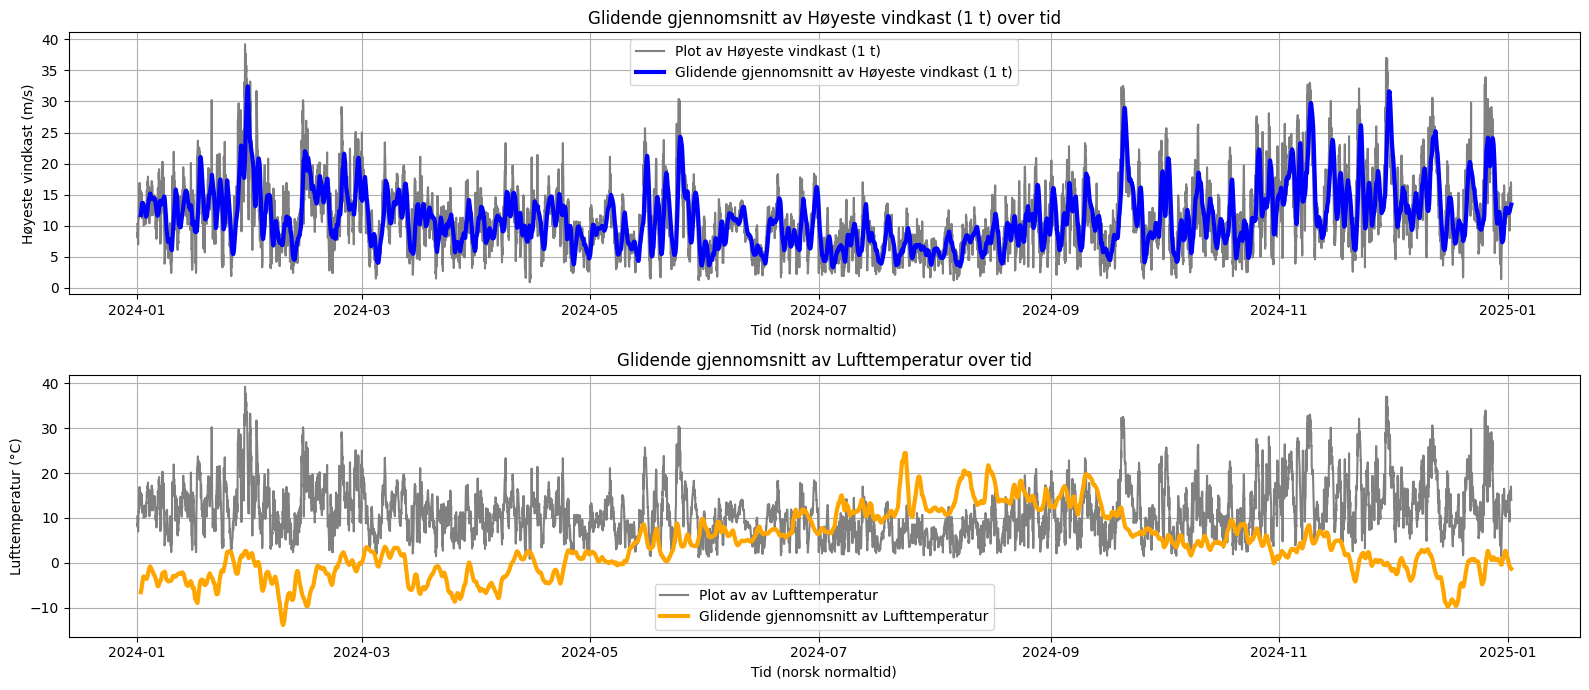

In [4]:
window_size = 24

mv_vind = del2.moving_average("Høyeste vindkast (1 t)", window_size)
mv_temp = del2.moving_average("Lufttemperatur", window_size)

# Plotting glidende gjennomsnitt
plt.figure(figsize=(16, 7))
plt.subplot(2, 1, 1)
plt.plot(data["Tid(norsk normaltid)"], data["Høyeste vindkast (1 t)"], label="Plot av Høyeste vindkast (1 t)", color="grey")
plt.plot(data["Tid(norsk normaltid)"], mv_vind, label="Glidende gjennomsnitt av Høyeste vindkast (1 t)", color="blue", linewidth=3)
plt.title("Glidende gjennomsnitt av Høyeste vindkast (1 t) over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Høyeste vindkast (m/s)")
plt.grid(True)
plt.legend()

# Plotting glidende gjennomsnitt for lufttemperatur 
plt.subplot(2, 1, 2)
plt.plot(data["Tid(norsk normaltid)"], data["Høyeste vindkast (1 t)"], label="Plot av av Lufttemperatur", color="grey")
plt.plot(data["Tid(norsk normaltid)"], mv_temp, label="Glidende gjennomsnitt av Lufttemperatur", color="orange", linewidth=3)
plt.title("Glidende gjennomsnitt av Lufttemperatur over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Lufttemperatur (°C)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Boxplot med bruk av seaborn

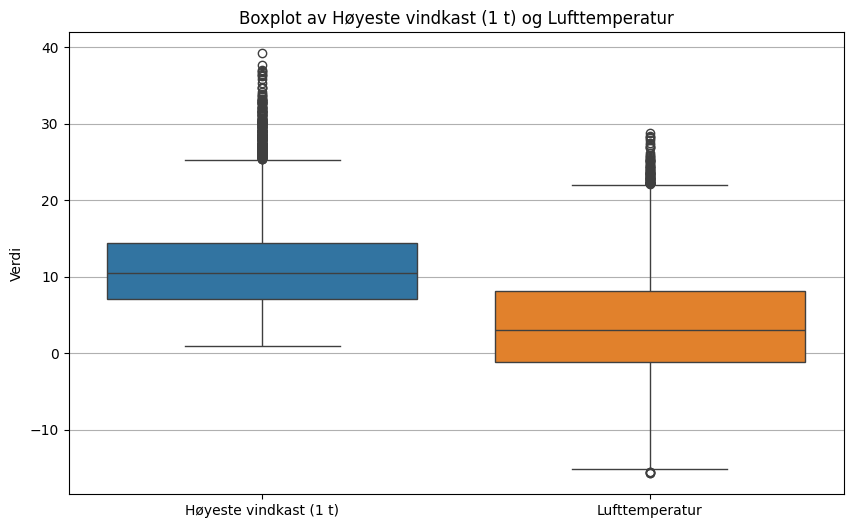

In [5]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[["Høyeste vindkast (1 t)", "Lufttemperatur"]])
plt.title("Boxplot av Høyeste vindkast (1 t) og Lufttemperatur")
plt.ylabel("Verdi")
plt.grid(axis="y")
plt.show()

# Prediktiv Analyse

In [ ]:
# Trener lineær regresjon for vindkast og temperatur
reg_vind, start_tid_vind = del2.train_linear_regression("Høyeste vindkast (1 t)")
reg_temp, start_tid_temp = del2.train_linear_regression("Lufttemperatur")

# Printer Parametrene
print("Vindmodell:", reg_vind.intercept_, reg_vind.coef_)
print("Temperaturmodell:", reg_temp.intercept_, reg_temp.coef_) 


Vindmodell: 10.532077032108088 [0.00017168]
Temperaturmodell: -0.62684664010437 [0.00100353]
0          0.0
1          1.0
2          2.0
3          3.0
4          4.0
         ...  
8804    8804.0
8805    8805.0
8806    8806.0
8807    8807.0
8808       NaN
Name: medgått_tid, Length: 8809, dtype: float64


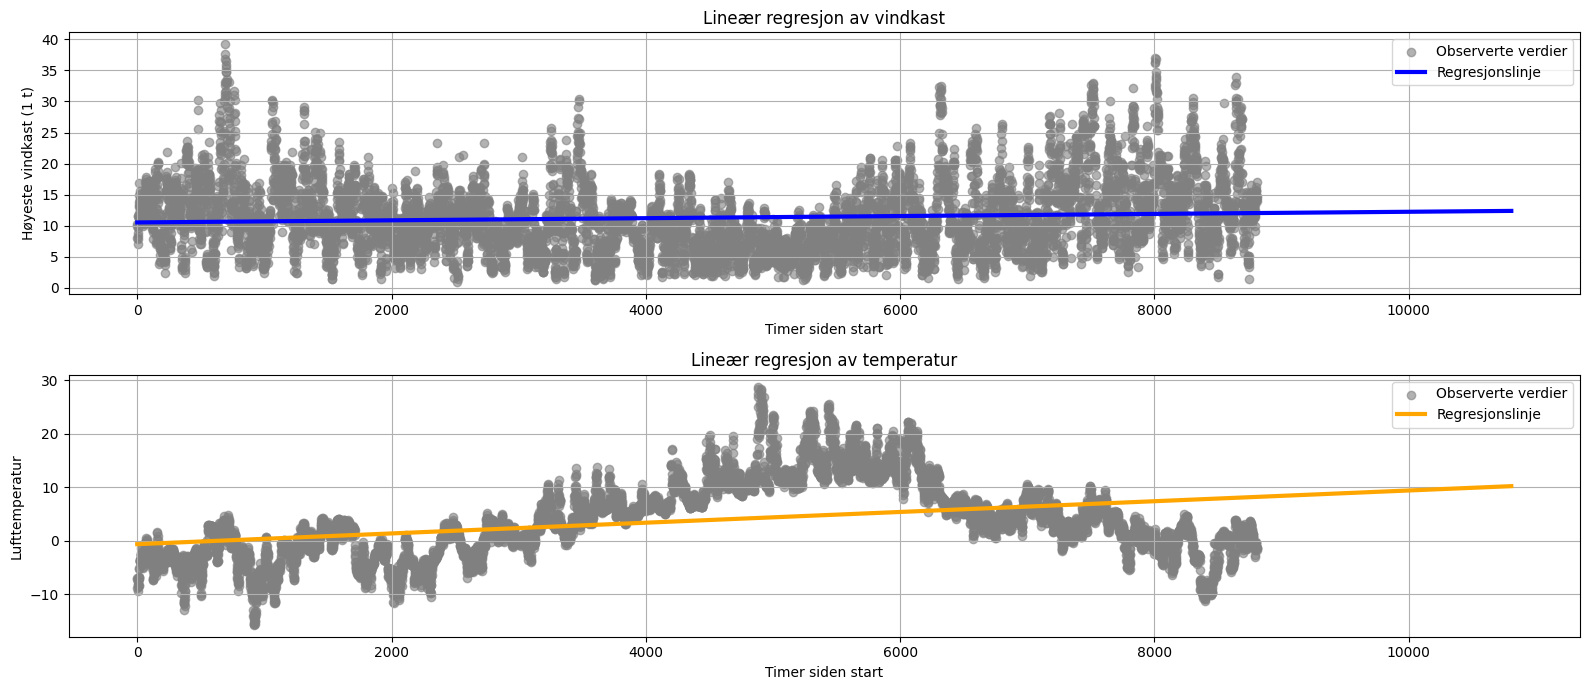

: 

In [ ]:
x = del2.data["medgått_tid"]
y = [del2.data["Høyeste vindkast (1 t)"], del2.data["Lufttemperatur"]]

# Predikering av verdier utover dataene
x_extended = np.linspace(x.min(), x.max() + 2000, 1000)
y_predicted_vind = del2.predict(reg_vind, x_extended)
y_predicted_temp = del2.predict(reg_temp, x_extended)

#Plotting "Høyeste vindkast (1 t)" og "Lufttemperatur" over tid
plt.figure(figsize=(16, 7))

#Plot for "Høyeste vindkast (1 t)"
plt.subplot(2, 1, 1)
plt.scatter(x, y[0], label="Observerte verdier", alpha= 0.6, color="grey")
plt.plot(x_extended, y_predicted_vind, color="blue", label="Regresjonslinje", linewidth=3)
plt.title("Lineær regresjon av vindkast")
plt.xlabel("Timer siden start")
plt.ylabel("Høyeste vindkast (1 t)")
plt.legend()
plt.grid(True)

# Plot for "Lufttemperatur"
plt.subplot(2, 1, 2)
plt.scatter(x, y[1], label="Observerte verdier", alpha=0.6, color="grey")
plt.plot(x_extended, y_predicted_temp, color="orange", label="Regresjonslinje", linewidth=3)
plt.title("Lineær regresjon av temperatur")
plt.xlabel("Timer siden start")
plt.ylabel("Lufttemperatur")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
#mean_vind = data["Høyeste vindkast (1 t)"].mean() #regner ut gjennomsnittet av høyeste vindkast
#print("Gjennomsnittlig høyeste vindkast (1 t):", mean_vind)
##regner ut gjennomsnittet av høyeste vindkast med numpy for å vise hvordan numpy kan brukes
#mean_vind_npy = np.mean(data["Høyeste vindkast (1 t)"]) 
#print("Gjennomsnittlig høyeste vindkast (1 t) med numpy:", mean_vind_npy)
#print()
#
#std_vind = data["Høyeste vindkast (1 t)"].std() #regner ut standardavviket av høyeste vindkast
#print("Standardavvik av høyeste vindkast (1 t):", std_vind)
#median_vind = data["Høyeste vindkast (1 t)"].median() #regner ut medianen av høyeste vindkast
#print("Median av høyeste vindkast (1 t):", median_vind)
#print()
#
#mean_temp = data["Lufttemperatur"].mean() #regner ut gjennomsnittet av lufttemperatur
#print("Gjennomsnittlig lufttemperatur:", mean_temp)
#std_temp = data["Lufttemperatur"].std() #regner ut standardavviket av lufttemperatur    
#print("Standardavvik av lufttemperatur:", std_temp)
#median_temp = data["Lufttemperatur"].median() #regner ut medianen av lufttemperatur
#print("Median av lufttemperatur:", median_temp)
#
##Enkel Statisktisk analyse av dataene
#summary = data[["Høyeste vindkast (1 t)","Lufttemperatur"]].describe() #regner ut beskrivende statistikk av dataene
#print(summary)

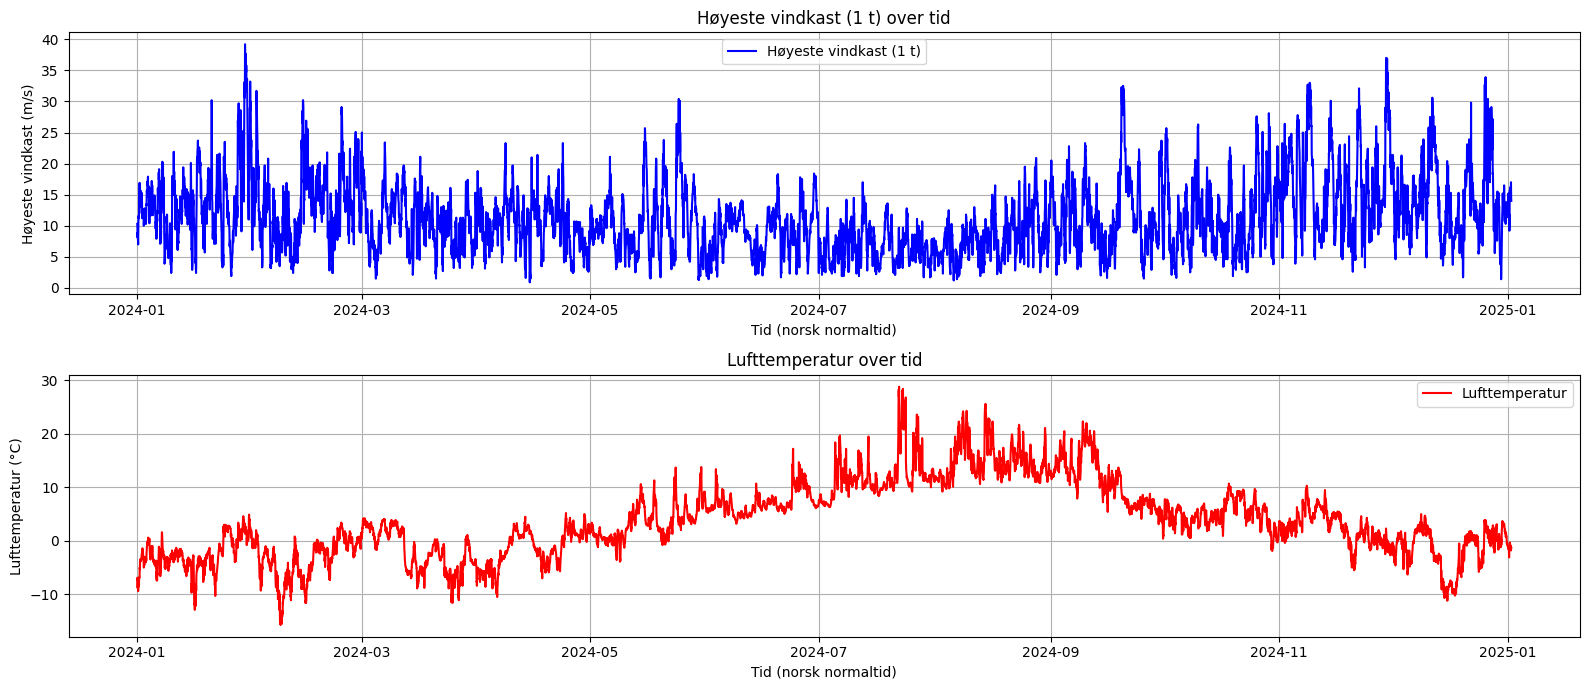

In [8]:
#Plotting "Høyeste vindkast (1 t)" og "Lufttemperatur" over tid
plt.figure(figsize=(16, 7))

#Plot for "Høyeste vindkast (1 t)"
plt.subplot(2, 1, 1)
plt.plot(data["Tid(norsk normaltid)"], data["Høyeste vindkast (1 t)"], label="Høyeste vindkast (1 t)", color="blue")
plt.title("Høyeste vindkast (1 t) over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Høyeste vindkast (m/s)")
plt.grid(True)
plt.legend()

# Plot for "Lufttemperatur"
plt.subplot(2, 1, 2)
plt.plot(data["Tid(norsk normaltid)"], data["Lufttemperatur"], label="Lufttemperatur", color="red")
plt.title("Lufttemperatur over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Lufttemperatur (°C)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Tar i bruk moving average for å håndtere manglende data og glatte ut kurvene
#Definerer en funksjon for å beregne glidende gjennomsnitt
#def moving_average(signal, window_size):
#    return np.convolve(signal, np.ones(window_size)/window_size, mode='valid')

window_size = 5 # Definerer vinduets størrelse for glidende gjennomsnitt
moving_avg_vind = moving_average(data["Høyeste vindkast (1 t)"], window_size)
moving_avg_temp = moving_average(data["Lufttemperatur"], window_size)

# Plotting glidende gjennomsnitt
plt.figure(figsize=(16, 7))
plt.subplot(2, 1, 1)
plt.plot(data["Tid(norsk normaltid)"][window, moving_avg_vind, label="Glidende gjennomsnitt av Høyeste vindkast (1 t)", color="grey")
plt.plot(data["Tid(norsk normaltid)"][window_size-1:], moving_avg_vind, label="Glidende gjennomsnitt av Høyeste vindkast (1 t)", color="blue")
plt.title("Glidende gjennomsnitt av Høyeste vindkast (1 t) over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Høyeste vindkast (m/s)")
plt.grid(True)
plt.legend()

# Plotting glidende gjennomsnitt for lufttemperatur 
plt.subplot(2, 1, 2)
plt.scatter(data["Tid(norsk normaltid)"][window_size-1:], moving_avg_temp, label="Glidende gjennomsnitt av Lufttemperatur", color="grey")
plt.plot(data["Tid(norsk normaltid)"][window_size-1:], moving_avg_temp, label="Glidende gjennomsnitt av Lufttemperatur", color="red")
plt.title("Glidende gjennomsnitt av Lufttemperatur over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Lufttemperatur (°C)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



NameError: name 'moving_average' is not defined

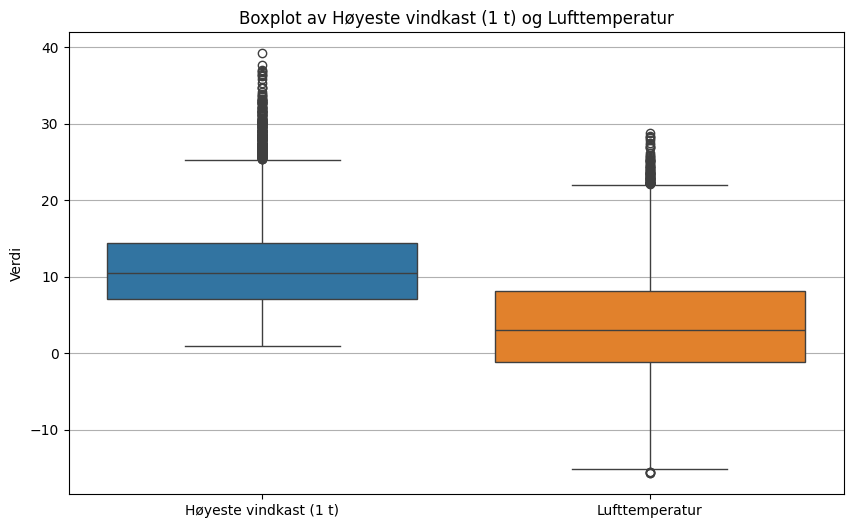

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[["Høyeste vindkast (1 t)", "Lufttemperatur"]])
plt.title("Boxplot av Høyeste vindkast (1 t) og Lufttemperatur")
plt.ylabel("Verdi")
plt.grid(axis="y")
plt.show()

In [ ]:
# Importerer nødvendige biblioteker for regresjonsanalyse
from sklearn.linear_model import LinearRegression

start_time = data["Tid(norsk normaltid)"].min() #regner ut starttidspunktet for dataene
data["Tid(norsk normaltid)"] = (data["Tid(norsk normaltid)"] - start_time).dt.total_seconds() / 3600 #konverterer tid til timer fra starttidspunktet

# Rydder data ved å fjerne rader med NaN-verdier i de relevante kolonnene som er nødvendig for å unngå feil under regresjonsanalysen
data_clean_vind = data.dropna(subset=["Høyeste vindkast (1 t)"])
data_clean_temp = data.dropna(subset=["Lufttemperatur"])

reg_vind = LinearRegression()
reg_temp = LinearRegression()

# Fit the models
reg_vind.fit(data_clean_vind[["Tid(norsk normaltid)"]], data_clean_vind["Høyeste vindkast (1 t)"])
reg_temp.fit(data_clean_temp[["Tid(norsk normaltid)"]], data_clean_temp["Lufttemperatur"])  


print(reg_vind.intercept_, reg_vind.coef_)
print(reg_temp.intercept_, reg_temp.coef_)

def predict_vind(tid):
    return reg_vind.intercept_ + reg_vind.coef_[0] * tid

print("Prediksjon av vindkast ved tid 0:", predict_vind(0))



10.532077032108088 [0.00017168]
-0.62684664010437 [0.00100353]
Prediksjon av vindkast ved tid 0: 10.532077032108088


c:\Users\tager\OneDrive\NTNU\TDT4114\ANV_prosjekt-1\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\tager\OneDrive\NTNU\TDT4114\ANV_prosjekt-1\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


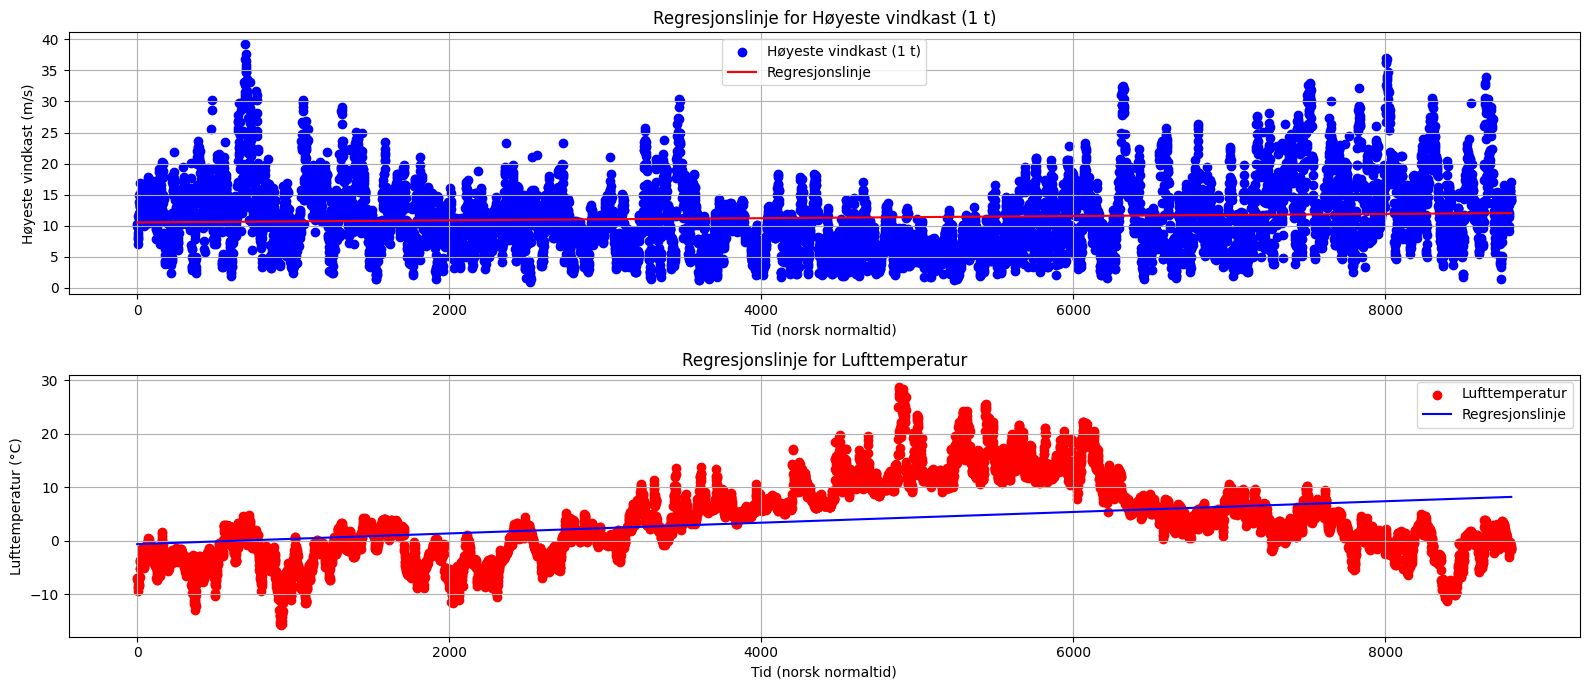

In [ ]:
#Plotte regresjonslinjen mot dataene

# Normalize the "Tid(norsk normaltid)" column for regression
time_vind = data_clean_vind["Tid(norsk normaltid)"].to_numpy().reshape(-1, 1)
time_temp = data_clean_temp["Tid(norsk normaltid)"].to_numpy().reshape(-1, 1)

# Predict using the normalized time values
x_vind = reg_vind.predict(time_vind)
x_temp = reg_temp.predict(time_temp)

plt.figure(figsize=(16, 7))
plt.subplot(2, 1, 1) 
plt.scatter(data["Tid(norsk normaltid)"], data["Høyeste vindkast (1 t)"], label="Høyeste vindkast (1 t)", color="blue")
plt.plot(data_clean_vind["Tid(norsk normaltid)"], x_vind, label="Regresjonslinje", color="red")
plt.title("Regresjonslinje for Høyeste vindkast (1 t)")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Høyeste vindkast (m/s)")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(data["Tid(norsk normaltid)"], data["Lufttemperatur"], label="Lufttemperatur", color="red")
plt.plot(data_clean_temp["Tid(norsk normaltid)"], x_temp, label="Regresjonslinje", color="blue")
plt.title("Regresjonslinje for Lufttemperatur")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Lufttemperatur (°C)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()